In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [291]:
df = pd.read_csv("Customer Feedback.csv")
pd.set_option("display.max_rows", None)

In [14]:
df

,Timestamp,age,gender,which type of product you prefer more,what type of taste you prefer more,what you prefer more in snacks ?,you generally buy on the basis of
0,2022/05/28 5:20:03 pm GMT+5:30,19.0,male,Namkeen (ex haldiram);biscuit ( parle g),sweet,quality,public opinions
1,2022/05/28 5:30:22 pm GMT+5:30,19.0,male,Namkeen (ex haldiram);chocolate ( dairy milk);...,neutral,quality,personal choice
2,2022/05/28 5:31:11 pm GMT+5:30,18.0,male,chips / kurkure (ex lays ),chilly,quality,personal choice
3,2022/05/28 5:32:02 pm GMT+5:30,19.0,male,chips / kurkure (ex lays ),chilly,quality,personal choice
4,2022/05/28 5:33:59 pm GMT+5:30,19.0,male,chips / kurkure (ex lays );drinks / juice ( fu...,chilly,quality,personal choice
...,...,...,...,...,...,...,...
67,2022/05/28 10:15:38 pm GMT+5:30,19.0,female,Namkeen (ex haldiram),chilly,quality,personal choice
68,2022/05/28 10:33:55 pm GMT+5:30,60.0,Prefer not to say,drinks / juice ( furity);protein products (pro...,neutral,quality,personal choice
69,2022/05/28 10:45:44 pm GMT+5:30,18.0,male,Namkeen (ex haldiram);chips / kurkure (ex lays ),chilly,quality,personal choice
70,2022/05/28 10:46:53 pm GMT+5:30,18.0,female,chocolate ( dairy milk);protein products (prot...,chilly,quality,personal choice


In [7]:
df.keys()

Index(['Timestamp', 'age ', 'gender ', 'which type of product you prefer more',
       'what type of taste you prefer more ',
       'what you prefer more in snacks ?',
       'you generally buy on the basis of '],
      dtype='object')

In [9]:
x = df[["age ", 'gender ']]

In [10]:
x.head()

,age,gender
0,19.0,male
1,19.0,male
2,18.0,male
3,19.0,male
4,19.0,male


In [24]:
x["gender "] = x["gender "].replace(["Prefer not to say"], "male")

C:\Users\91797\AppData\Local\Temp/ipykernel_17748/4266809903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["gender "] = x["gender "].replace(["Prefer not to say"], "male")


In [31]:
len(set(df["what type of taste you prefer more "]))

4

In [32]:
from sklearn.preprocessing import LabelEncoder
target = LabelEncoder()

In [34]:
target = target.fit_transform(df["what type of taste you prefer more "])

In [38]:
features = x
k = pd.get_dummies(features["gender "])

In [39]:
k.shape

(72, 2)

In [48]:
features = pd.concat([features, k], axis=1)

In [50]:
features.drop(["gender ", "male"], axis=1, inplace=True)

In [53]:
features.rename(columns = {"female": "gender"})

,age,gender
0,19.0,0
1,19.0,0
2,18.0,0
3,19.0,0
4,19.0,0
...,...,...
67,19.0,1
68,60.0,0
69,18.0,0
70,18.0,1


In [55]:
target = np.array(target)

In [261]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.9)

In [250]:
from sklearn import tree

In [262]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [263]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 3, 0, 1])

In [264]:
model.score(x_test, y_test)

0.375

In [265]:
y_test

array([1, 2, 0, 3, 1, 3, 0, 3])

In [266]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
model2 = RandomForestClassifier(n_estimators=50, criterion="gini")

In [267]:
model2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [268]:
model2.predict(x_test)

array([0, 3, 0, 0, 0, 3, 0, 1])

In [269]:
model2.score(x_test, y_test)

0.375

In [270]:
from sklearn.metrics import confusion_matrix
predicted = model2.predict(x_test)
cm = confusion_matrix(y_test, predicted)
cm

array([[2, 0, 0, 0],
       [2, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 0, 1]], dtype=int64)

Text(33.0, 0.5, 'true')

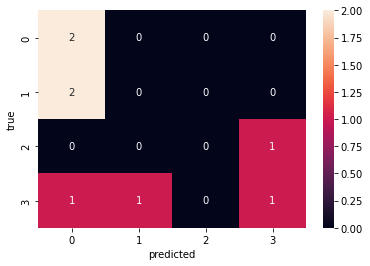

In [271]:
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("true")

In [272]:
features2 = df[["what you prefer more in snacks ?", "you generally buy on the basis of "]]

In [273]:
k = pd.get_dummies(features2["what you prefer more in snacks ?"])
m = pd.get_dummies(features2["you generally buy on the basis of "])

In [274]:
features2 = pd.concat([features, k, m], axis=1)

In [275]:
features2.drop(["quantity", "personal choice"], inplace=True, axis=1)

In [276]:
features2.head()

,age,female,quality,public opinions
0,19.0,0,1,1
1,19.0,0,1,0
2,18.0,0,1,0
3,19.0,0,1,0
4,19.0,0,1,0


In [277]:
features2.rename(columns={"public opinions":"opinions"}, inplace=True)

In [278]:
features2

,age,female,quality,opinions
0,19.0,0,1,1
1,19.0,0,1,0
2,18.0,0,1,0
3,19.0,0,1,0
4,19.0,0,1,0
...,...,...,...,...
67,19.0,1,1,0
68,60.0,0,1,0
69,18.0,0,1,0
70,18.0,1,1,0


In [279]:
model3 = RandomForestClassifier(n_estimators=150, criterion="entropy")

In [280]:
x_train, x_test, y_train, y_test = train_test_split(features2, target, train_size=0.9)

In [281]:
model3.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [282]:
model3.predict(x_test)

array([3, 0, 0, 3, 0, 3, 0, 3])

In [283]:
model3.score(x_test, y_test)

0.625

In [187]:
features3 = features2.drop(["age "], inplace=False, axis=1)

In [214]:
model4 = RandomForestClassifier(n_estimators=150, criterion="entropy")
x_train, x_test, y_train, y_test = train_test_split(features3, target, train_size=0.9)

In [215]:
model4.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [216]:
model4.score(x_test, y_test)

0.5

In [285]:
import pickle

In [286]:
with open("Final_model", "wb") as f:
    pickle.dump(model3, f)

In [287]:
with open("Final_model", "rb") as f:
    dummy = pickle.load(f)

In [288]:
x_test

,age,female,quality,opinions
46,18.0,0,1,0
45,20.0,0,1,0
41,18.0,1,1,0
50,18.0,0,1,0
66,18.0,1,1,0
9,18.0,0,1,0
54,19.0,1,1,0
21,19.0,0,1,0


In [290]:
dummy.predict([[18, 0, 1, 0]])

array([3])

In [292]:
df.loc[46].at["you generally buy on the basis of "]

'personal choice'

In [294]:
#automation of input
def predictor(age, gender, quality, opinions):
    if gender.capitalize == "Female":
        gender = 1
    if gender.capitalize == 'Male':
        gender = 0
    if quality.capitalize == "Quality":
        quality = 1
    if quality.capitalize == "Quantity":
        quality = 0
    if opinions.capitalize == "personal choice":
        opinions = 0
    if opinions.capitalize == "public opinions":
        opinions = 1
    return dummy.predict[[age, gender, quality, opinions]]